In [7]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
from graforvfl import RvflClassifier

shap.initjs()

In [8]:
# Load dataset
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)

In [9]:
# Define model
model = RvflClassifier(size_hidden=10, act_name='tanh', weight_initializer="random_normal", reg_alpha=0.5, seed=42)
model.fit(X_train, y_train)

RvflClassifier(act_name='tanh', reg_alpha=0.5, seed=42)

# Explain predictions

In [10]:
f = lambda x: model.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)
shap_values_single = explainer.shap_values(X.iloc[0,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values_single, X_display.iloc[0,:])

In [11]:
shap_values = explainer.shap_values(X_valid.iloc[0:1000,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values, X_valid.iloc[0:1000,:])

  0%|          | 0/1000 [00:00<?, ?it/s]

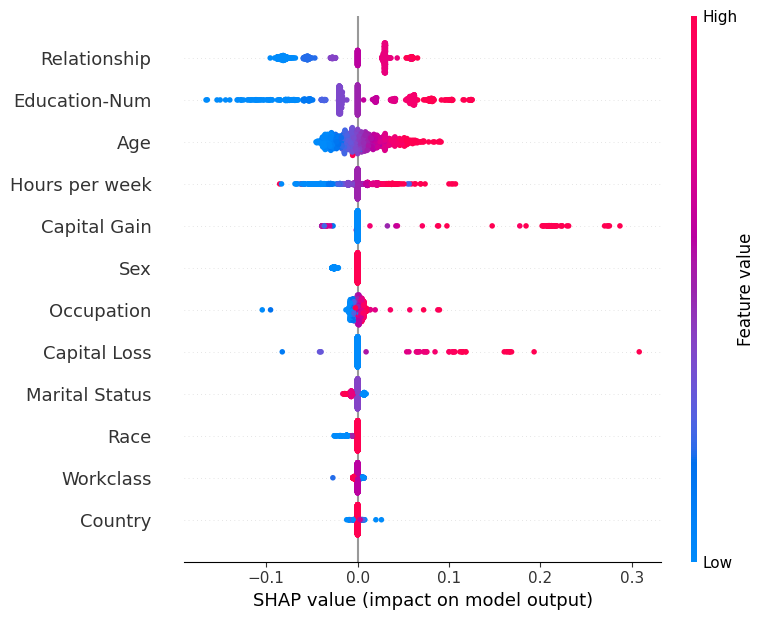

In [12]:
shap.summary_plot(shap_values, X_valid.iloc[0:1000,:])

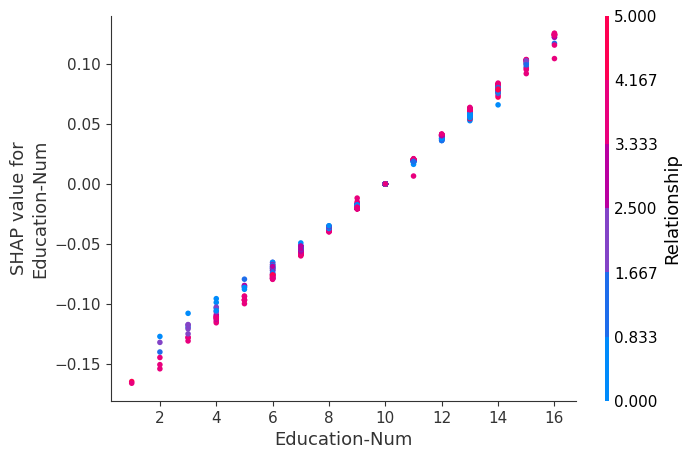

In [13]:
shap.dependence_plot("Education-Num", shap_values, X_valid.iloc[0:1000,:])